<a href="https://colab.research.google.com/github/sadman59m/My-ML/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

- We need to apply feature scaling in SVR, because here, we don't have coefficients like linear relation.
- Also, there is no explicit equation like linear equation.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [20]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
# transform the y into 2D array to apply feature scaling.
y = y.reshape(len(y), 1)

In [21]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [22]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Applying Feature Scaling (Standard Deviation)

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [24]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [25]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR on the Whole Dataset

In [26]:
from sklearn.svm import SVR
# use Radial Basis Function kernel. Chekout the other kernerls as well
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting a new result.

We have to inverse the feature scaling to see the actual result.

In [28]:
# reshape to avoid errors
y_pred_scaled = regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1)
# Inverse the scaled predicted result
y_pred = sc_y.inverse_transform(y_pred_scaled)
print(y_pred)

[[170370.0204065]]


# Visualizing the SVR result

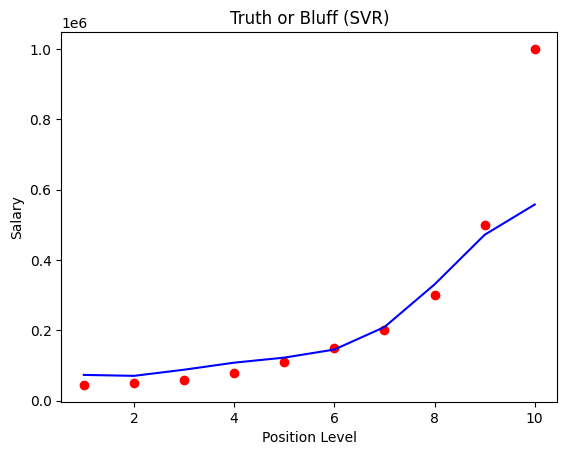

In [33]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)),
         color = 'blue')
plt.title("Truth or Bluff (SVR)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Making the curve High Density and Smoother

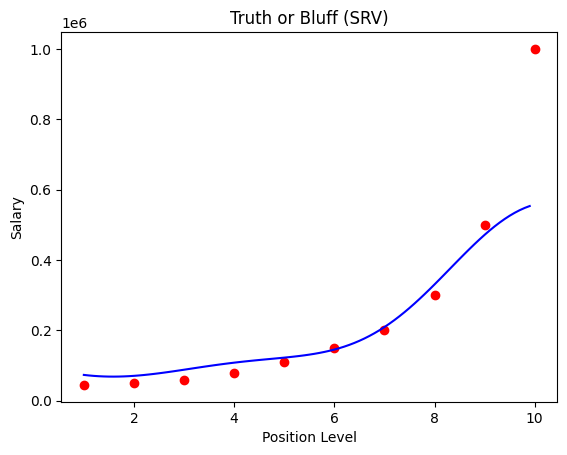

In [34]:
from numpy.lib.polynomial import poly
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
# Scale X_grid before prediction
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)),
         color = 'blue')
plt.title("Truth or Bluff (SRV)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()